### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('customer_churn.csv')  # load the dataset using pandas

In [3]:
df.head(5) #top five rows of the data set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape # number of rows and columns

(7043, 21)

In [5]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') # convert object datatype to float

### Cleaning The data

In [7]:
df.isnull().sum()  # check for number of missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df=df.dropna() #drops null values

In [9]:
df = df.drop('customerID', axis=1) #drops customer ID

In [10]:
df.duplicated().sum() #xhecks for number of duplicated columns

22

### EDA

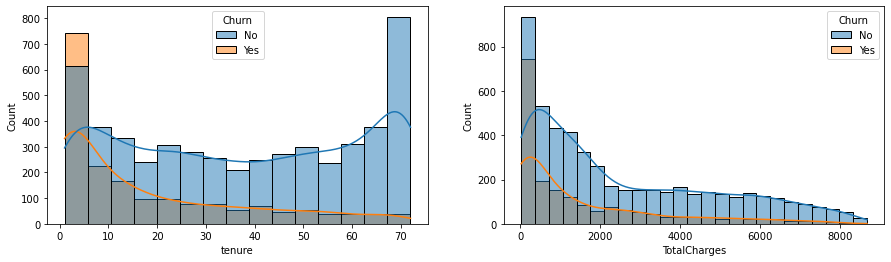

In [11]:
plt.figure(figsize=(15,4))
ax1=plt.subplot(1,2,1)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True,ax=ax1)
ax2=plt.subplot(1,2,2)
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True,ax=ax2);

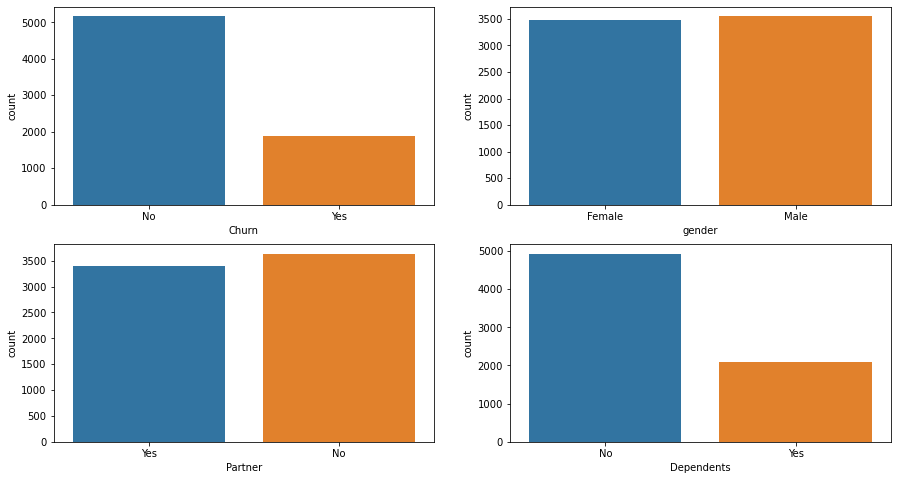

In [12]:
plt.figure(figsize=(15,8))
ax1=plt.subplot(2,2,1)
sns.countplot(data=df, x='Churn', ax=ax1)
ax2=plt.subplot(2,2,2)
sns.countplot(data=df, x='gender',ax=ax2)
ax3=plt.subplot(2,2,3)
sns.countplot(data=df, x='Partner', ax=ax3)
ax4=plt.subplot(2,2,4)
sns.countplot(data=df, x='Dependents', ax=ax4);

In [13]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1529,Female,0,Yes,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
2186,Male,0,Yes,Yes,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,862.40,No
4064,Female,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,50.15,50.15,No
5428,Female,0,Yes,No,9,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,89.45,853.10,Yes
3971,Female,0,No,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,692.10,Yes


### Preprocessing

In [14]:
df=df.replace('No internet service','No')
df=df.replace('No phone service','No')

In [15]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [16]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

### Feature Scaling

In [17]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
def scale(column):
    scaler.fit(df[[column]])
    df[column] = scaler.transform(df[[column]])

for x in df.columns:
    scale(x)

In [19]:
#seperates target from df
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [20]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [21]:
len(X_train.columns)

26

### Neural Network Model

In [27]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

### Evaluation

In [28]:
accuracy_score=model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7747


In [29]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

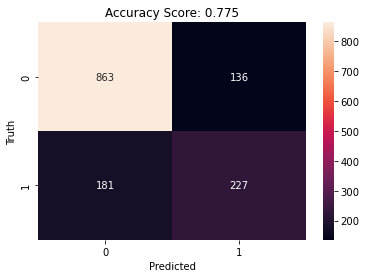

In [30]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
score = round(accuracy_score[1],3) 
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Accuracy Score: {0}'.format(score), size = 12);

In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       999
         1.0       0.63      0.56      0.59       408

    accuracy                           0.77      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407

